# Glass Classification
#### Можете ли вы правильно определить тип стекла?

Это набор идентификационных данных стекла от UCI. Он содержит 10 атрибутов, включая идентификатор. Ответ - тип стекла (дискретные 7 значений)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_csv('C:/Users/micha/Downloads/archive/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.shape

(214, 10)

In [5]:
X = glass.drop(['Type'], axis=1).values
Y = glass['Type'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Cоздаем объект классификатора, используя конструктор по умолчанию.

In [7]:
model = LogisticRegression()

Обучим наш классификатор на обучающей выборке:

In [8]:
model.fit(X_train, Y_train)

LogisticRegression()

Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

In [9]:
Y_pred = model.predict(X_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

In [10]:
model_info = [metrics.accuracy_score(Y_test, Y_pred), 
              metrics.precision_score(Y_test, Y_pred, average='weighted'), 
              metrics.recall_score(Y_test, Y_pred, average='weighted')]

<AxesSubplot:title={'center':'Метрики эффективности классификации'}>

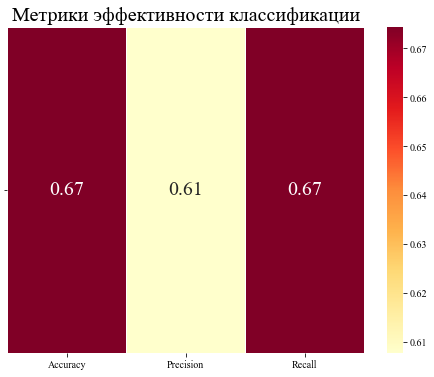

In [11]:
fig = plt.figure(figsize=(8,6))
sns.set_style({'font.family': 'Times New Roman'})

plt.title('Метрики эффективности классификации', fontdict={'size':20})

sns.heatmap([model_info], linewidths=.5, annot=True, cmap='YlOrRd', 
            xticklabels=['Accuracy', 'Precision', 'Recall'], yticklabels=[None], annot_kws={"fontsize":20})

Решим задачу классификации с помощью различных методов классификации

In [12]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'svc: gauss kernel': svm.SVC(kernel='linear'),
           'lda': LinearDiscriminantAnalysis(),
           'k = 4 neighbours': KNeighborsClassifier(n_neighbors=4),
           'k = 5 neighbours': KNeighborsClassifier(n_neighbors=5),
           'k = 6 neighbours': KNeighborsClassifier(n_neighbors=6),
           'mlp lbfgs': MLPClassifier(solver='lbfgs'),
           'mlp sgd': MLPClassifier(solver='sgd'),
           'mlp adam': MLPClassifier(solver='adam')}

In [13]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']
cmaps[72]

'YlOrRd'

In [14]:
def classifier(method):
    model = methods[method]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred),
                                  metrics.precision_score(Y_test, Y_pred, average='weighted'), 
                                  metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [15]:
methods_score = dict()
for method_name in methods.keys():
    classifier(method_name)

In [16]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

<AxesSubplot:title={'center':'Сравнение методов классификации'}>

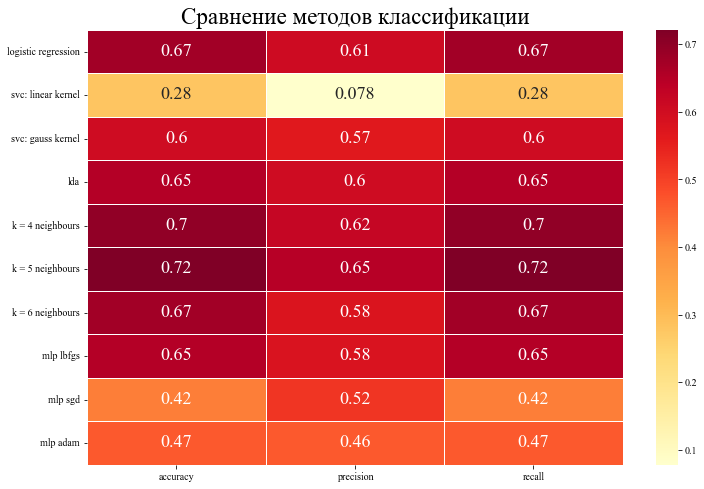

In [17]:
fig = plt.figure(figsize=(12, 8))
sns.set_style({'font.family': 'Times New Roman'})
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[72])

Видим, что наилучший средний показатель у метода k ближайших соседей с 5 соседями
Построим кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, Y, scoring='accuracy')

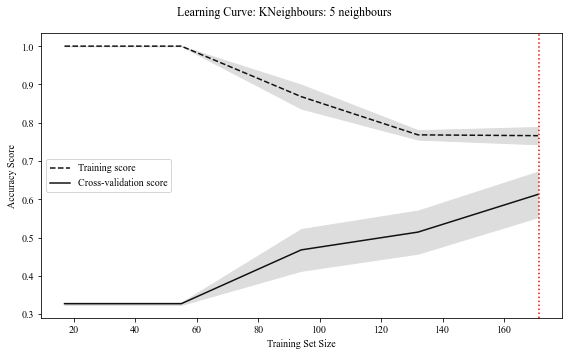

In [20]:
fig = plt.figure(figsize=(8,5))
plt.suptitle("Learning Curve: KNeighbours: 5 neighbours")


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.axvline(x=len(glass.Type)*0.8, linestyle=':', color='red')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.tight_layout()

plt.legend(['Training score', 'Cross-validation score'], loc='best')
plt.show()

С увеличением обучающей выборки точность `test` и `train` начинает сходиться: пока один график увеличивается, другой начинает уменьшаться

Посмотрим наглядно на результаты классификация для различных соотношений `test` и `train` выборок 

In [21]:
def train_test_splitting(test_size):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=True)
    model = methods['k = 5 neighbours']
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    train_test_split_result[str(test_size)] = [metrics.accuracy_score(Y_test, Y_pred),
                                               metrics.precision_score(Y_test, Y_pred, average='weighted'), 
                                               metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [22]:
train_test_split_result = dict()
variants = np.array([0.5, 0.4, 0.3, 0.2, 0.1])

for test_size in variants:
    train_test_splitting(test_size)

In [23]:
tts_df = pd.DataFrame(train_test_split_result.values(),
                      columns = ['accuracy','precision','recall'],
                      index = variants)

<AxesSubplot:title={'center':'Сравнение результатов для разных размеров test и train'}>

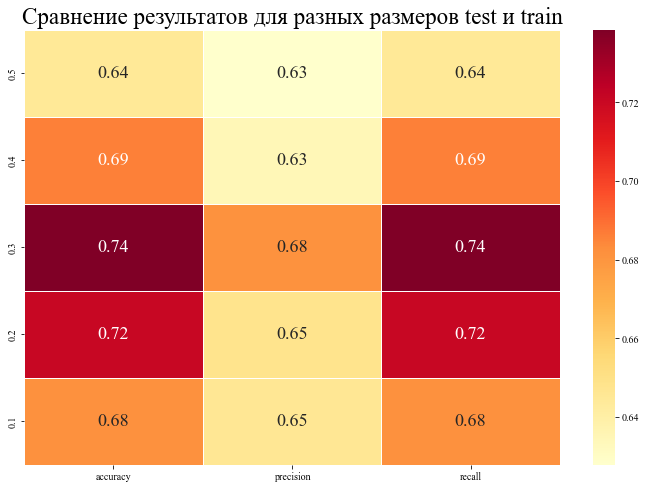

In [24]:
fig = plt.figure(figsize=(12, 8))
plt.title('Сравнение результатов для разных размеров test и train', fontsize = 23)


sns.heatmap(tts_df, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[72])

Видим, что наилучший результат получается для `train size` = 0.3

## Результат
Мы добились следующих значений метрик эффективности классификации:

* Метрика __Accuracy__ (метрика достоверности предсказания) = __0.74__
* Метрика __Precision__ (метрика точности) = __0.68__
* Метрика __Recall__ (метрика полноты) = __0.74__